# Question-1

## Download 3 coloured images and apply basic image transformations.

In [86]:
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

## Image import

In [2]:
img1 = plt.imread(r'C://Users//jayag//Desktop//Marwadi//SEM-6//CV//Assignment-1//.ipynb_checkpoints//images.jpeg')

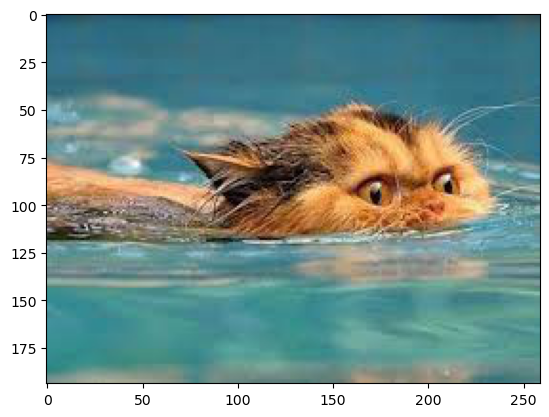

In [3]:
plt.imshow(img1)

In [4]:
img2 = plt.imread(r'C://Users//jayag//Desktop//Marwadi//SEM-6//CV//Assignment-1//.ipynb_checkpoints//img2.webp')

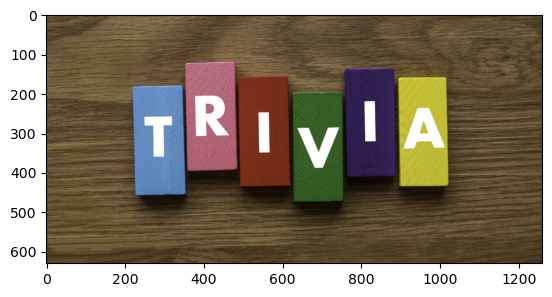

In [5]:
plt.imshow(img2)

In [6]:
img3 = plt.imread(r'C://Users//jayag//Desktop//Marwadi//SEM-6//CV//Assignment-1//.ipynb_checkpoints//img3.webp')

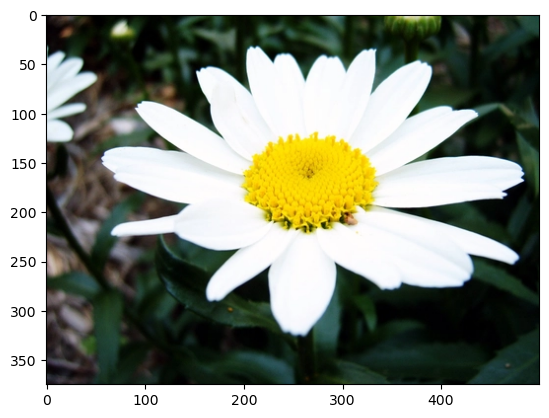

In [7]:
plt.imshow(img3)

## Rotation

In [8]:
def rotate_img(image,angle):
    height , width = image.shape[:2]
    
    angle_rad = np.radians(angle)
    
    new_width = int(abs(width * np.cos(angle_rad)) + abs(height * np.sin(angle_rad)))
    new_height = int(abs(width * np.sin(angle_rad)) + abs(height * np.cos(angle_rad)))
    
    rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    center_x = width // 2
    center_y = height // 2
    
    new_center_x = new_width // 2
    new_center_y = new_height // 2
    
    for x in range(new_width):
        for y in range(new_height):
           
            rel_x = x - new_center_x
            rel_y = y - new_center_y
            
            rotated_x = int(rel_x * np.cos(angle_rad) - rel_y * np.sin(angle_rad) + center_x)
            rotated_y = int(rel_x * np.sin(angle_rad) + rel_y * np.cos(angle_rad) + center_y)
            
            if 0 <= rotated_x < width and 0 <= rotated_y < height:
                rotated_image[y, x] = image[rotated_y, rotated_x]
    return rotated_image

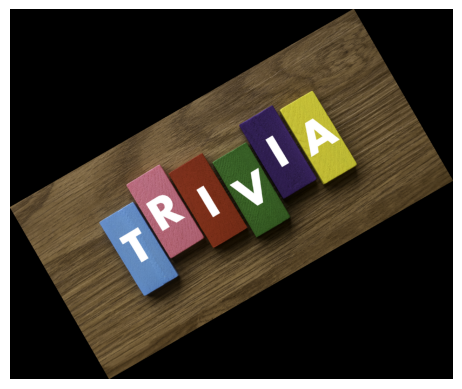

In [9]:
rotated_image = rotate_img(img2, 30)  
plt.imshow(rotated_image)  
plt.axis('off')
plt.show()

# Croping

In [10]:
def crop_image(image, top_left, bottom_right):
    cropped_image = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    return cropped_image

(-0.5, 299.5, 229.5, -0.5)

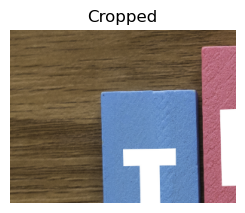

In [11]:
top_left_corner = (100, 100) 
bottom_right_corner = (400 ,330)

cropped_image = crop_image(img2, top_left_corner, bottom_right_corner)
plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped')
plt.axis('off')

# Fliping

In [12]:
def flip_image(image, direction='horizontal'):
    
    height, width = image.shape[:2]
    
    
    flipped_image = np.zeros_like(image)
    
    if direction == 'horizontal':
        # Flip horizontally
        flipped_image[:, :] = image[:, ::-1]
    elif direction == 'vertical':
        # Flip vertically
        flipped_image[:, :] = image[::-1, :]
    else:
        raise ValueError("Invalid direction. Choose 'horizontal' or 'vertical'.")
    
    return flipped_image


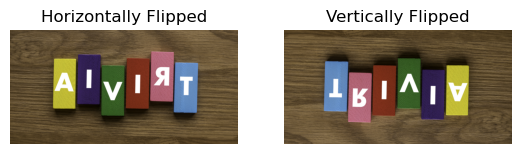

In [13]:
flipped_image_horizontal = flip_image(img2, direction='horizontal')  
flipped_image_vertical = flip_image(img2, direction='vertical')  

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 2)
plt.imshow(flipped_image_horizontal)
plt.title('Horizontally Flipped')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(flipped_image_vertical)
plt.title('Vertically Flipped')
plt.axis('off')

plt.show()

## Scaling

In [14]:
def scale_image(image, scale_factor):
    
    height, width = image.shape[:2]

    new_height = int(height * scale_factor * 2)
    new_width = int(width * scale_factor * 2)
    
    scaled_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            original_x = int(x / scale_factor)
            original_y = int(y / scale_factor)
            
            if 0 <= original_x < width and 0 <= original_y < height:
                scaled_image[y, x] = image[original_y, original_x]
    
    return scaled_image




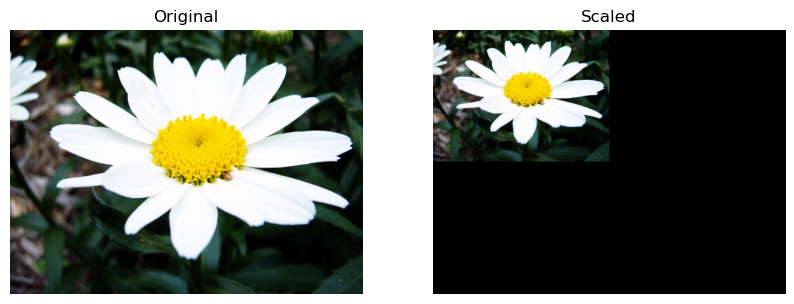

In [15]:
scale_factor = 5
scaled_image = scale_image(img3, scale_factor)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scaled_image)
plt.title('Scaled')
plt.axis('off')

plt.show()


# Translation

In [16]:
def translate_image(image, dx, dy):
    height, width = image.shape[:2]

    translated_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x - dx
            new_y = y - dy
            
            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image[y, x] = image[new_y, new_x]
    
    return translated_image



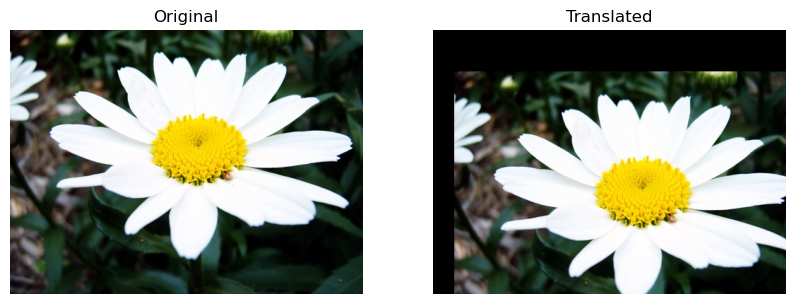

In [17]:

dx = 30  # Shift in the x-direction
dy = 60  # Shift in the y-direction

translated_image = translate_image(img3, dx, dy)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title('Translated')
plt.axis('off')

plt.show()

# Shearing

In [18]:
def shear_image(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.array([[1, shear_factor],[0, 1]])
    sheared_image = np.zeros_like(image)
    
    for y in range(height):
        for x in range(width):
            new_x = int(x + y * shear_factor)
            new_y = y
            if 0 <= new_x < width and 0 <= new_y < height:
                sheared_image[y, x] = image[new_y, new_x]
    
    return sheared_image





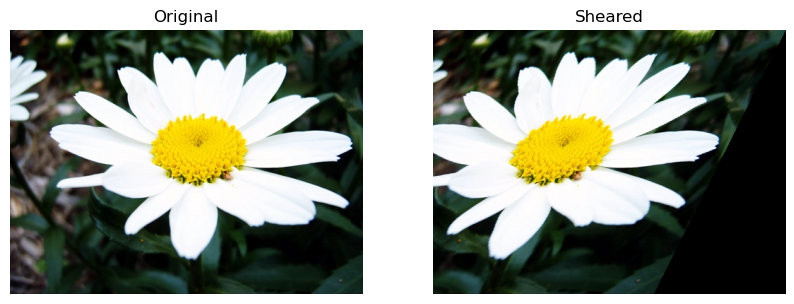

In [19]:
shear_factor = 0.5

sheared_image = shear_image(img3, shear_factor)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared')
plt.axis('off')

plt.show()

# Bright Adjustment

In [20]:
def adjust_brightness(image, brightness_factor):
    brightness_factor = max(min(brightness_factor, 0.1), -0.9)
    adjusted_image = image ** brightness_factor - 1
    adjusted_image = np.clip(adjusted_image, 0, 1)
    
    return adjusted_image    

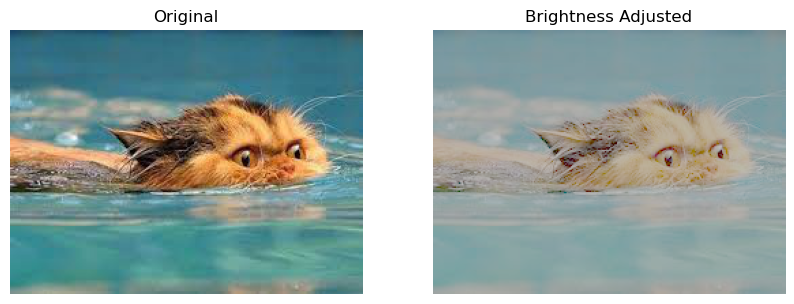

In [21]:
brightness_factor = 0.9
adjusted_image = adjust_brightness(img1, brightness_factor)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image)
plt.title('Brightness Adjusted')
plt.axis('off')

plt.show()

# GrayScale

In [22]:
def convert_to_grayscale(image):
    grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    return grayscale_image

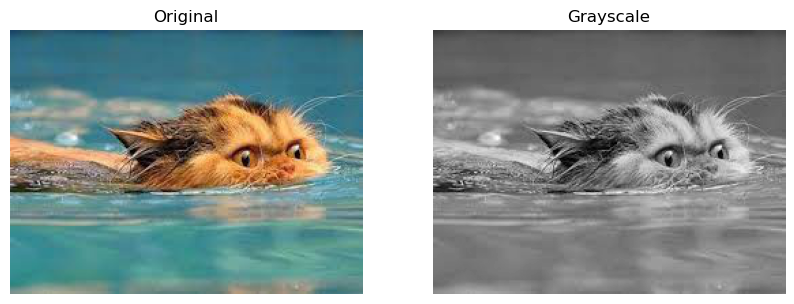

In [23]:
grayscale_image = convert_to_grayscale(img1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.show()

# Question-2

## Add noise to a coloured image using python and then apply denoising filter to remove the noise.

(-0.5, 258.5, 193.5, -0.5)

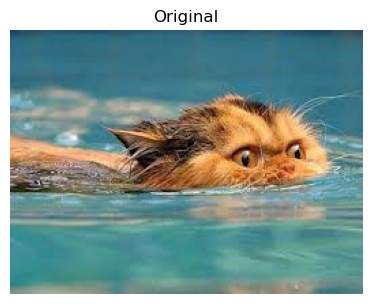

In [24]:
img1 = plt.imread(r'C://Users//jayag//Desktop//Marwadi//SEM-6//CV//Assignment-1//.ipynb_checkpoints//images.jpeg')
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original')
plt.axis('off')

In [25]:
noise = np.random.normal(loc=0, scale=25, size=img1.shape)
noisy_image = np.clip(img1 + noise, 0, 255).astype(np.uint8)

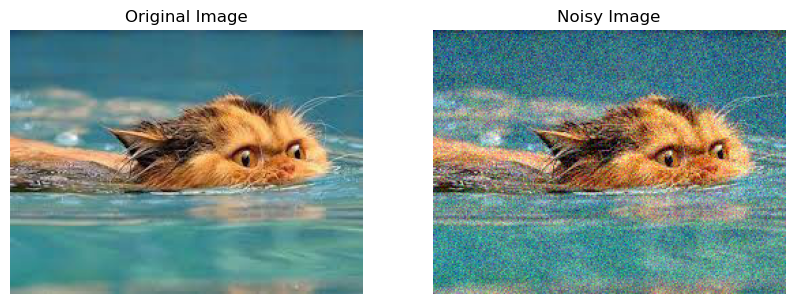

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.show()

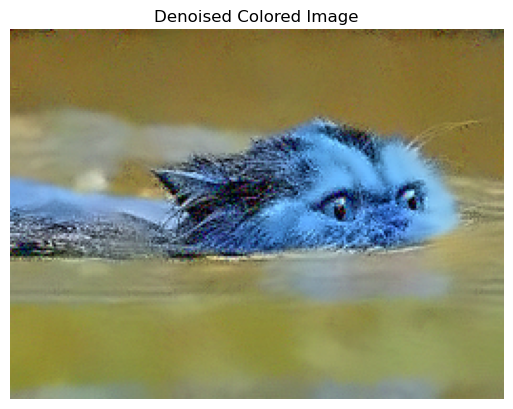

In [41]:
import cv2
def remove_noise(image):
    # Apply Non-Local Means Denoising
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    
    return denoised_image


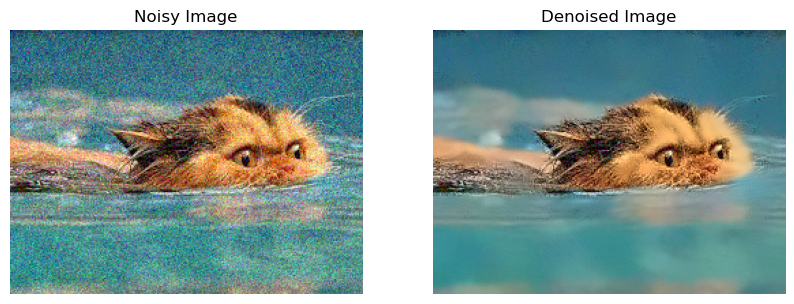

In [43]:
denoised_colored_image = remove_noise(noisy_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_colored_image)
plt.title('Denoised Image')
plt.axis('off')

plt.show()

# Question-3

## Using dataset cats vs dogs (https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset), implement deep learning model to achieve accuracy more than 50%.

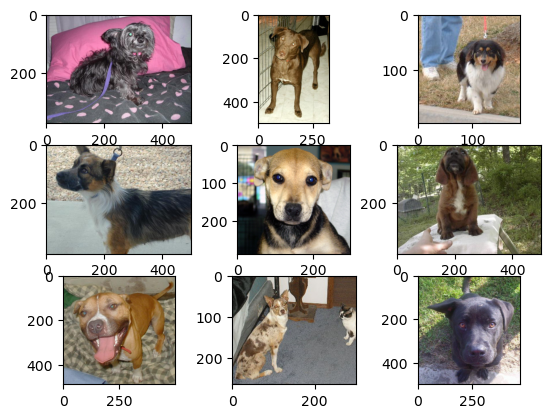

In [47]:
from matplotlib import pyplot
from matplotlib.image import imread

folder = 'C:/Users/jayag/Desktop/Marwadi/SEM-6/CV/Assignment-1/PetImages/Dog/'
# plot first few images
for i in range(9):

    pyplot.subplot(330 + 1 + i)
    filename = folder  + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
# show the figure
pyplot.show()

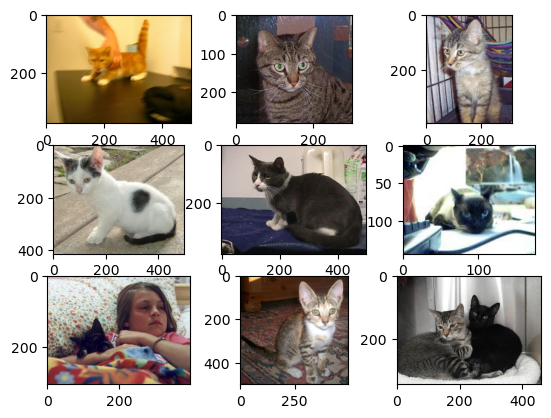

In [50]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/jayag/Desktop/Marwadi/SEM-6/CV/Assignment-1/PetImages/Cat/'
# plot first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder  + str(i) + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [64]:
import numpy as np
import pandas as pd
import os, shutil
import warnings

In [70]:

# orginal path
path_file_cat = 'C:/Users/jayag/Desktop/Marwadi/SEM-6/CV/Assignment-1/PetImages/Cat'
path_file_dog = 'C:/Users/jayag/Desktop/Marwadi/SEM-6/CV/Assignment-1/PetImages/Dog'

base_dir = 'C:/Users/jayag/Desktop/Marwadi/SEM-6/CV/Assignment-1/Images'

# Train folder
Train_dir = os.path.join(base_dir, 'Train')

# cat folder in train
cat_train_dir = os.path.join(Train_dir, 'cat')

# dog folder in train
dog_train_dir = os.path.join(Train_dir, 'dog')

# Test Folder
Test_dir = os.path.join(base_dir, 'Test')

# cat folder in test
cat_test_dir = os.path.join(Test_dir, 'cat')

# dog folder in test
dog_test_dir = os.path.join(Test_dir, 'dog')

# validation folder
valid_dir = os.path.join(base_dir, 'validation')

# cat folder in validation
cat_val_dir = os.path.join(valid_dir, 'cat')

# dog folder in validation
dog_val_dir = os.path.join(valid_dir, 'dog')

In [71]:
os.mkdir(base_dir)

# Train folder
os.mkdir(Train_dir)

# cat folder in train
os.mkdir(cat_train_dir)

# dog folder in train
os.mkdir(dog_train_dir)

# Test Folder
os.mkdir(Test_dir)

# cat folder in test
os.mkdir(cat_test_dir)

# dog folder in test
os.mkdir(dog_test_dir)

# validation folder
os.mkdir(valid_dir)

# cat folder in validation
os.mkdir(cat_val_dir)

# dog folder in validation
os.mkdir(dog_val_dir)

In [72]:
train_list_cat_file = [f'{i}.jpg' for i in range(6500)]
train_list_dog_file = [f'{i}.jpg' for i in range(6500)]

test_list_cat_file = [f'{i}.jpg' for i in range(6500, 9500)]
test_list_dog_file = [f'{i}.jpg' for i in range(6500, 9500)]

val_list_cat_file = [f'{i}.jpg' for i in range(9500, 12500)]
val_list_dog_file = [f'{i}.jpg' for i in range(9500, 12500)]

In [74]:
# organaize cat and dog in train folders
# cat
for filename in train_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_train_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in train_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_train_dir, filename)
    shutil.copyfile(src, dst)
    
# organaize cat and dog in test folders
# cat
for filename in test_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_test_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in test_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_test_dir, filename)
    shutil.copyfile(src, dst)
    
# organaize cat and dog in validation folders
# cat
for filename in val_list_cat_file:
    src = os.path.join(path_file_cat, filename)
    dst = os.path.join(cat_val_dir, filename)
    shutil.copyfile(src, dst)
    
# dog
for filename in val_list_dog_file:
    src = os.path.join(path_file_dog, filename)
    dst = os.path.join(dog_val_dir, filename)
    shutil.copyfile(src, dst)

In [75]:
print("number of cat img in train folder: ", len(os.listdir(cat_train_dir)))
print("number of dog img in train folder: ", len(os.listdir(dog_train_dir)))
print("number of cat img in test folder: ", len(os.listdir(cat_test_dir)))
print("number of dog img in test folder: ", len(os.listdir(dog_test_dir)))
print("number of cat img in validation folder: ", len(os.listdir(cat_val_dir)))
print("number of dog img in validation folder: ", len(os.listdir(dog_val_dir)))

number of cat img in train folder:  6500
number of dog img in train folder:  6500
number of cat img in test folder:  3000
number of dog img in test folder:  3000
number of cat img in validation folder:  3000
number of dog img in validation folder:  3000


In [77]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

In [79]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [81]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


In [84]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/2
649/649 [==============================] - 155s 239ms/step - loss: 0.6080 - acc: 0.6692 - val_loss: 0.5301 - val_acc: 0.7590
Epoch 2/2
649/649 [==============================] - 150s 230ms/step - loss: 0.5699 - acc: 0.7090 - val_loss: 0.4831 - val_acc: 0.7714


In [87]:
# Evaluate the model
model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

[0.48304483294487, 0.7712374329566956]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


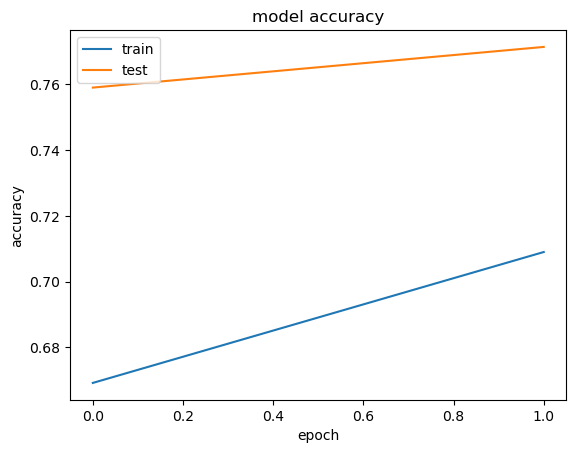

In [88]:
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



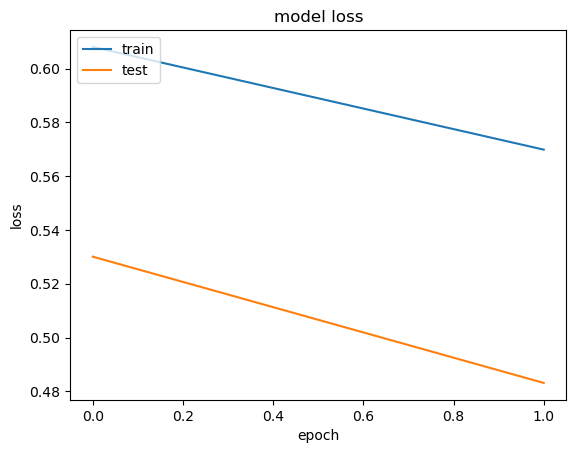

In [89]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()